# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.002797e+01     7.646814e+00
 * time: 0.005013942718505859
     1     2.212929e+01     4.054145e+00
 * time: 0.028110980987548828
     2     1.577426e+01     2.424419e+00
 * time: 0.05633997917175293
     3     1.182392e+01     2.121617e+00
 * time: 0.08121800422668457
     4     1.003878e+01     1.074976e+00
 * time: 0.11551308631896973
     5     9.415731e+00     1.563365e+00
 * time: 0.13554096221923828
     6     8.939464e+00     7.846955e-01
 * time: 0.15457701683044434
     7     8.660420e+00     6.421245e-01
 * time: 0.17383289337158203
     8     8.440230e+00     8.861370e-01
 * time: 0.19237995147705078
     9     8.268408e+00     4.720320e-01
 * time: 0.21122503280639648
    10     8.160130e+00     4.181644e-01
 * time: 0.23093891143798828
    11     8.091274e+00     3.739908e-01
 * time: 0.25095295906066895
    12     8.025033e+00     2.973728e-01
 * time: 0.27139997482299805
    13     7.992217e+00     4.936317e-01
 * tim

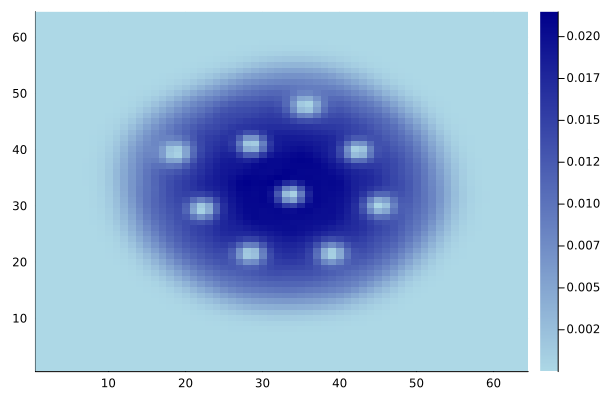

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)